In [1]:
#!pip install -r requirements.txt


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
from fredapi import Fred
from datetime import datetime


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\trait

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\trait

AttributeError: _ARRAY_API not found

In [3]:
from Analysis.utils import EDA_comparison, FredIndicatorFetcher,HistoricalDataDownloader

In [4]:
sp500_data = pd.read_excel('data/sp500_data.xlsx')
economic_indicators_data = pd.read_excel('data/economic_indicators_data.xlsx')

In [5]:
# Configurar estilos de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [32]:
a = EDA_comparison(sp500_data = sp500_data, economic_indicators_data =economic_indicators_data)
merged_data = a.merged_data


***

In [36]:
merged_data

,^GSPC CLOSE,Daily Return,CLI,BCI,GDP,CCI
Date,,,,,,
2000-02-01,1409.280029,0.010628,101.16580,100.61020,101.5818,102.8489
2000-03-01,1379.189941,0.009346,101.08020,100.41700,101.6581,102.7685
2000-05-01,1468.250000,0.010892,100.84420,99.99604,101.7747,102.7249
2000-06-01,1448.810059,0.019858,100.69700,99.77863,101.7674,102.6267
2000-08-01,1438.099976,0.005081,100.34110,99.41608,101.6210,102.5589
...,...,...,...,...,...,...
2023-12-01,4594.629883,0.005874,99.71788,98.76071,100.5243,98.1097
2024-01-02,4742.830078,-0.005661,99.99000,99.14000,100.1272,99.1000
2024-01-03,4704.810059,-0.008016,100.11000,99.13000,100.2548,98.8300


In [40]:
# Normalización base 100
merged_data['^GSPC CLOSE (Normalized)'] = (merged_data['^GSPC CLOSE'] / merged_data['^GSPC CLOSE'].iloc[0]) * 100

# Mostrar los primeros valores normalizados
merged_data[['^GSPC CLOSE', '^GSPC CLOSE (Normalized)']].head()


,^GSPC CLOSE,^GSPC CLOSE (Normalized)
Date,,
2000-02-01,1409.280029,100.000000
2000-03-01,1379.189941,97.864861
2000-05-01,1468.250000,104.184404
2000-06-01,1448.810059,102.804980
2000-08-01,1438.099976,102.045012


In [44]:
from scipy import stats
import numpy as np

# Calcular el Z-score para la columna normalizada
z_scores = np.abs(stats.zscore(merged_data['^GSPC CLOSE (Normalized)']))

# Definir un umbral para considerar un valor como outlier (por ejemplo, Z-score > 3)
outliers = np.where(z_scores > 2)

# Mostrar los outliers
outlier_indices = np.unique(outliers[0])
outlier_data = merged_data.iloc[outlier_indices]
print("Outliers encontrados en los datos normalizados:")
print(outlier_data[['^GSPC CLOSE', '^GSPC CLOSE (Normalized)']])


Outliers encontrados en los datos normalizados:
            ^GSPC CLOSE  ^GSPC CLOSE (Normalized)
Date                                             
2021-09-01  4524.089844                321.021355
2021-10-01  4357.040039                309.167798
2021-11-01  4613.669922                327.377798
2021-12-01  4513.040039                320.237280
2022-02-01  4546.540039                322.614381
2022-04-01  4545.859863                322.566117
2023-08-01  4576.729980                324.756605
2023-09-01  4515.770020                320.430995
2023-12-01  4594.629883                326.026750
2024-01-02  4742.830078                336.542772
2024-01-03  4704.810059                333.844939
2024-01-04  4688.680176                332.700392
2024-01-05  4697.240234                333.307798


In [49]:
# Verificar que los índices coincidan con los índices del DataFrame
outlier_indices = np.unique(outliers[0])
# print(f"Outlier indices: {outlier_indices}")
# print(f"Indices in merged_data: {merged_data.index.values}")

In [47]:
# Eliminar outliers del DataFrame usando iloc para referirse a posiciones de filas
data_without_outliers = merged_data.drop(merged_data.index[outlier_indices])

# Normalización base 100 sin outliers
data_without_outliers['^GSPC CLOSE (Normalized)'] = (data_without_outliers['^GSPC CLOSE'] / data_without_outliers['^GSPC CLOSE'].iloc[0]) * 100

# Mostrar los primeros valores normalizados sin outliers
print(data_without_outliers[['^GSPC CLOSE', '^GSPC CLOSE (Normalized)']].head())


            ^GSPC CLOSE  ^GSPC CLOSE (Normalized)
Date                                             
2000-02-01  1409.280029                100.000000
2000-03-01  1379.189941                 97.864861
2000-05-01  1468.250000                104.184404
2000-06-01  1448.810059                102.804980
2000-08-01  1438.099976                102.045012


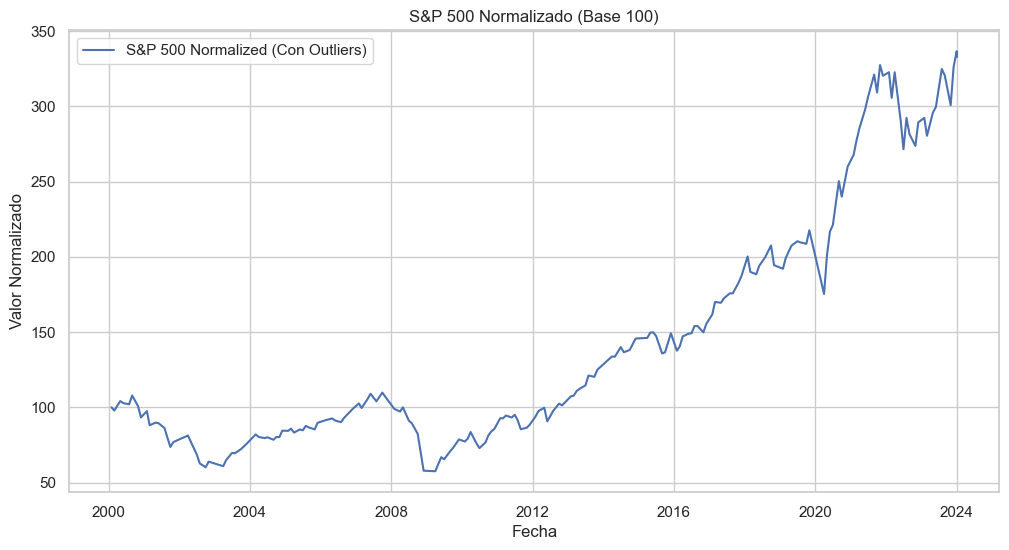

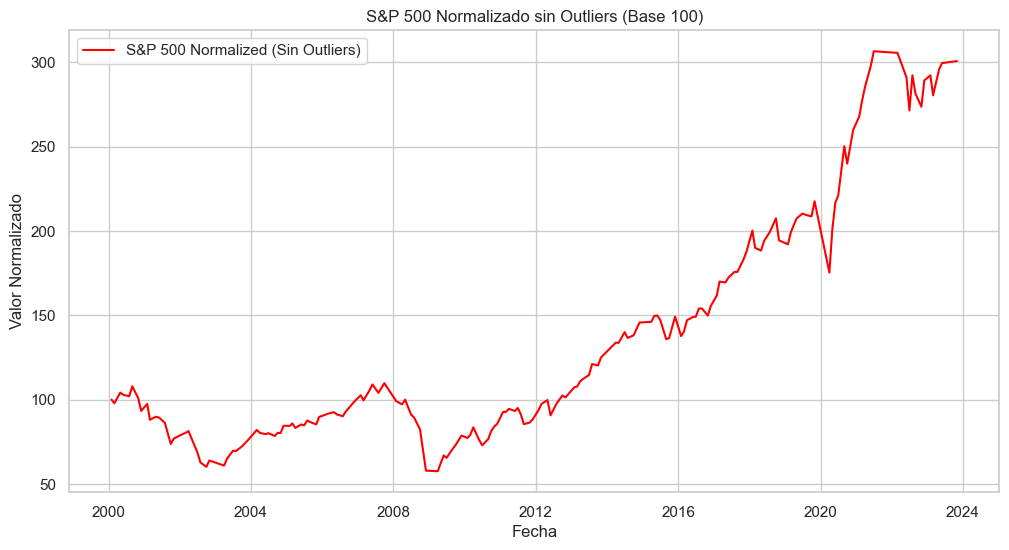

In [48]:
# Visualización de datos normalizados con outliers
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['^GSPC CLOSE (Normalized)'], label='S&P 500 Normalized (Con Outliers)')
plt.title('S&P 500 Normalizado (Base 100)')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()

# Visualización de datos normalizados sin outliers
plt.figure(figsize=(12, 6))
plt.plot(data_without_outliers.index, data_without_outliers['^GSPC CLOSE (Normalized)'], label='S&P 500 Normalized (Sin Outliers)', color='red')
plt.title('S&P 500 Normalizado sin Outliers (Base 100)')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()


*** 
### Otra estrategia

In [56]:
# Aplicar la transformación logarítmica
merged_data['^GSPC CLOSE (Log)'] = np.log(merged_data['^GSPC CLOSE'])

# Mostrar los primeros valores transformados
merged_data[['^GSPC CLOSE', '^GSPC CLOSE (Log)']].head()

,^GSPC CLOSE,^GSPC CLOSE (Log)
Date,,
2000-02-01,1409.280029,7.250834
2000-03-01,1379.189941,7.229252
2000-05-01,1468.250000,7.291826
2000-06-01,1448.810059,7.278498
2000-08-01,1438.099976,7.271078


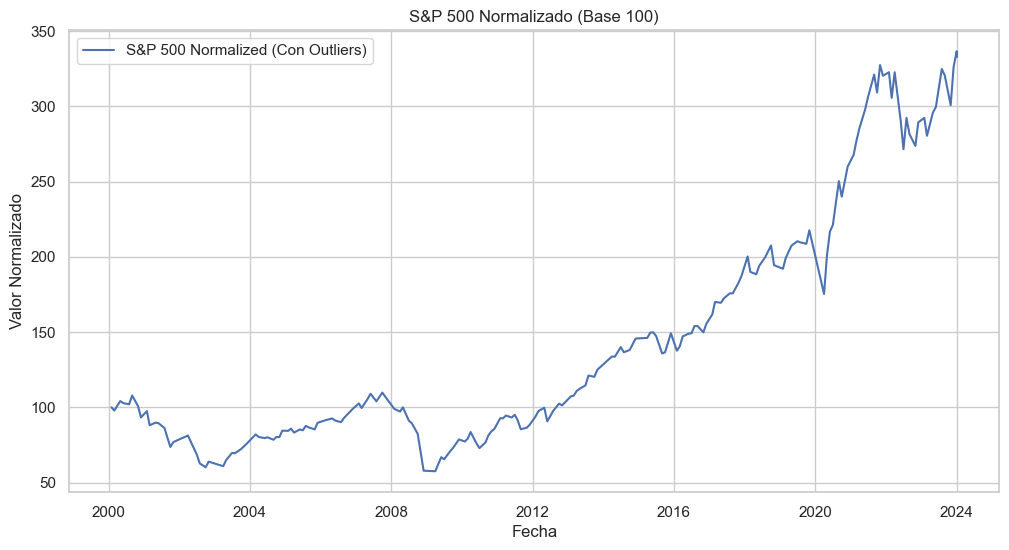

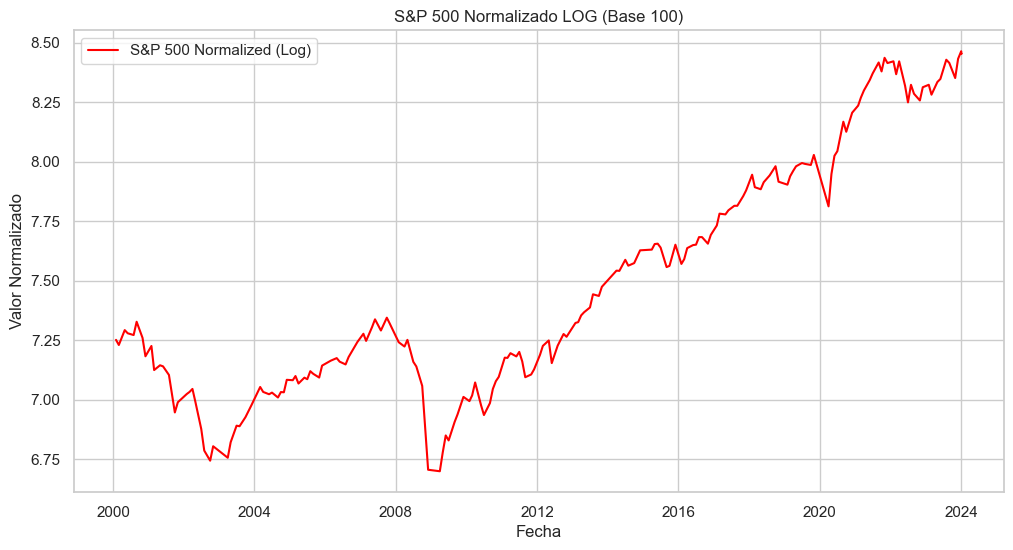

In [65]:
# Visualización de datos normalizados con outliers
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['^GSPC CLOSE (Normalized)'], label='S&P 500 Normalized (Con Outliers)')
plt.title('S&P 500 Normalizado (Base 100)')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()

# Visualización de datos normalizados log
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['^GSPC CLOSE (Log)'], label='S&P 500 Normalized (Log)', color='red')
plt.title('S&P 500 Normalizado LOG (Base 100)')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.show()


***
### Otra

In [68]:
!pip uninstall scikit-learn numpy
!pip install numpy scikit-learn


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Crear scalers
min_max_scaler = MinMaxScaler()
z_score_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Aplicar los scalers a los datos
merged_data['^GSPC CLOSE (Min-Max)'] = min_max_scaler.fit_transform(merged_data[['^GSPC CLOSE']])
merged_data['^GSPC CLOSE (Z-Score)'] = z_score_scaler.fit_transform(merged_data[['^GSPC CLOSE']])
merged_data['^GSPC CLOSE (Robust)'] = robust_scaler.fit_transform(merged_data[['^GSPC CLOSE']])

# Mostrar los primeros resultados normalizados
print(merged_data[['^GSPC CLOSE', '^GSPC CLOSE (Min-Max)', '^GSPC CLOSE (Z-Score)', '^GSPC CLOSE (Robust)']].head())


ImportError: cannot import name '_is_polars_df_or_series' from 'sklearn.utils.validation' (c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py)

***

In [20]:
a.data_summary()

First few rows of the data:
            ^GSPC CLOSE  Daily Return       CLI        BCI       GDP       CCI
Date                                                                          
2000-02-01  1409.280029      0.010628  101.1658  100.61020  101.5818  102.8489
2000-03-01  1379.189941      0.009346  101.0802  100.41700  101.6581  102.7685
2000-05-01  1468.250000      0.010892  100.8442   99.99604  101.7747  102.7249
2000-06-01  1448.810059      0.019858  100.6970   99.77863  101.7674  102.6267
2000-08-01  1438.099976      0.005081  100.3411   99.41608  101.6210  102.5589

Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2000-02-01 to 2024-01-05
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ^GSPC CLOSE   190 non-null    float64
 1   Daily Return  190 non-null    float64
 2   CLI           190 non-null    float64
 3   BCI           190 non-null    float64
 4   GDP           190 n

In [8]:
a.data_statistics()


Mean of each column:
^GSPC CLOSE     2064.267424
Daily Return       0.001984
CLI               99.797389
BCI               99.975078
GDP               99.886784
CCI               99.638549
dtype: float64

Median of each column:
^GSPC CLOSE     1477.275024
Daily Return       0.002651
CLI               99.920350
BCI               99.960060
GDP               99.946960
CCI               99.749000
dtype: float64

Mode of each column:
^GSPC CLOSE     811.080017
Daily Return     -0.089295
CLI              93.483700
BCI              95.797870
GDP              92.026080
CCI              98.830000
Name: 0, dtype: float64

Variance of each column:
^GSPC CLOSE     1.316035e+06
Daily Return    1.821335e-04
CLI             1.566776e+00
BCI             1.198722e+00
GDP             1.612227e+00
CCI             2.342966e+00
dtype: float64

Standard deviation of each column:
^GSPC CLOSE     1147.185868
Daily Return       0.013496
CLI                1.251709
BCI                1.094862
GDP              

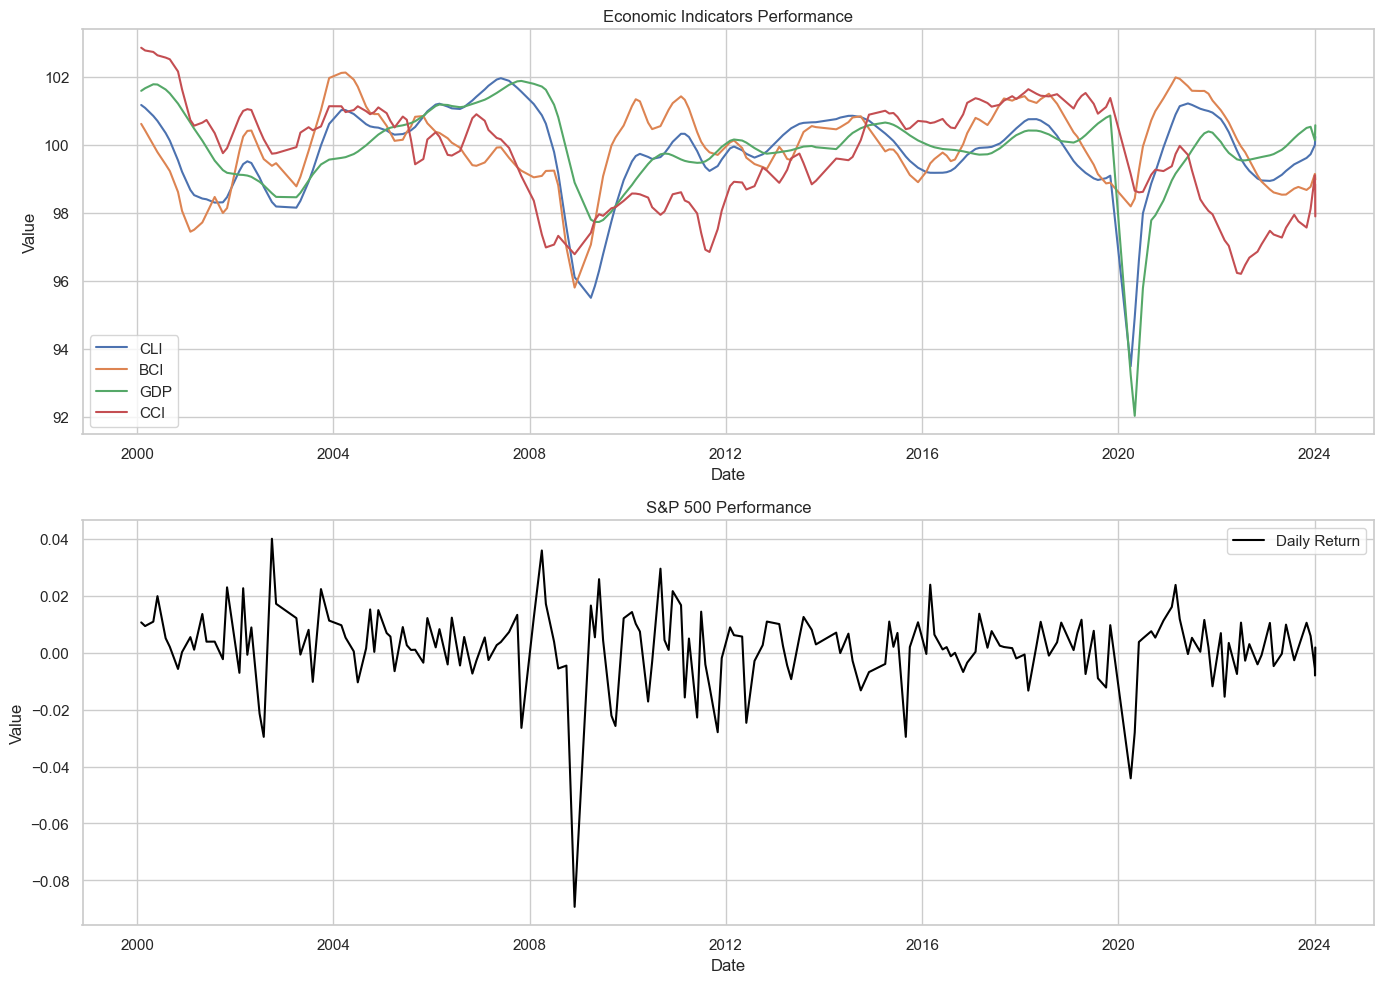

In [9]:
a.plot_performance()

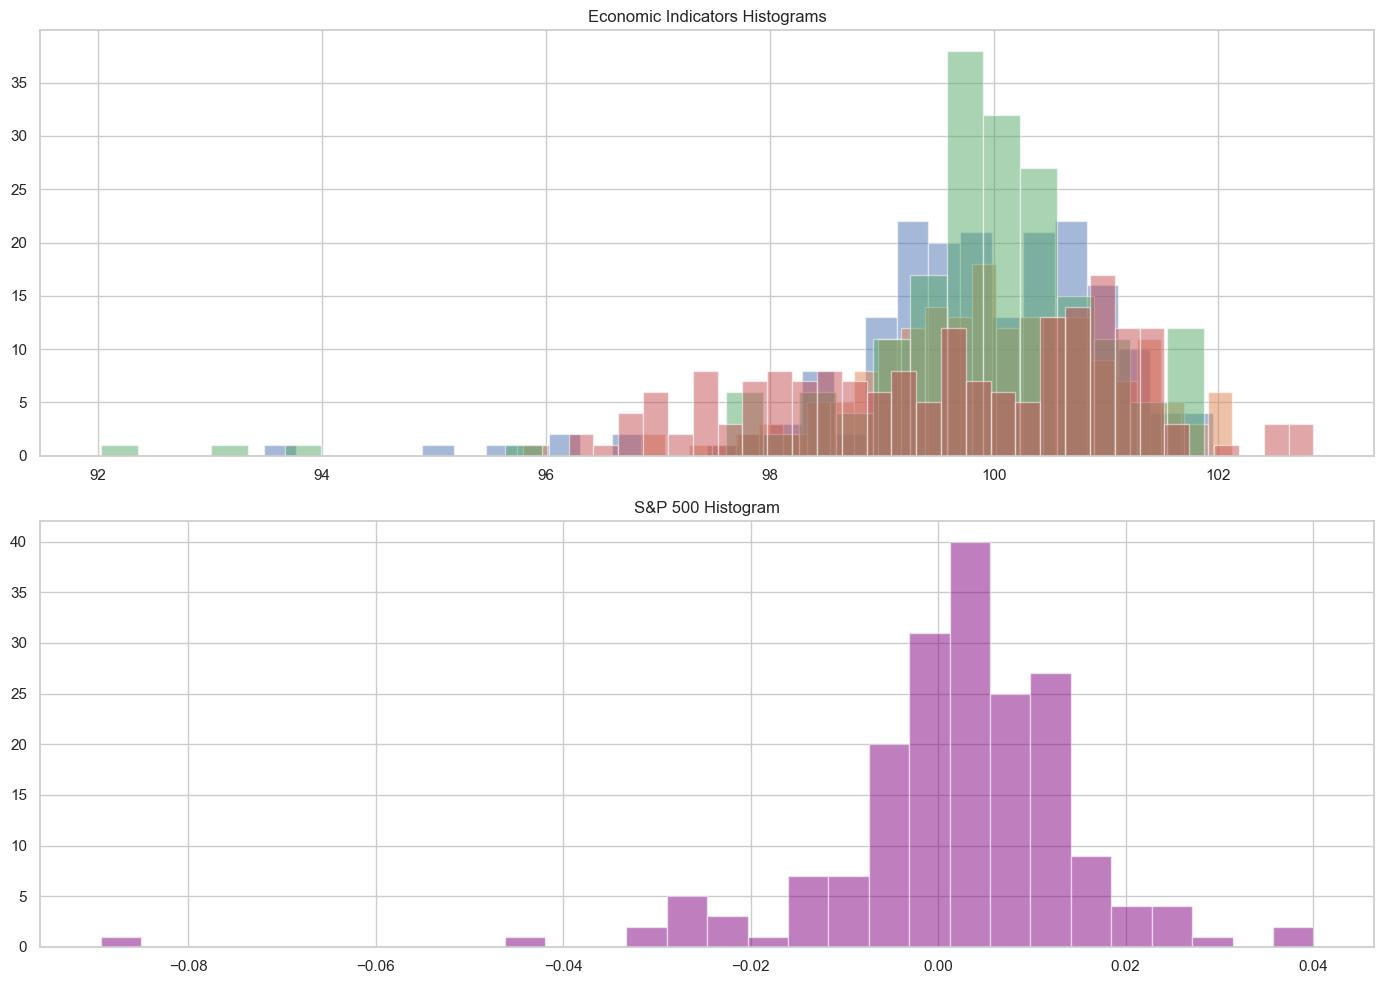

In [10]:
a.plot_histograms()

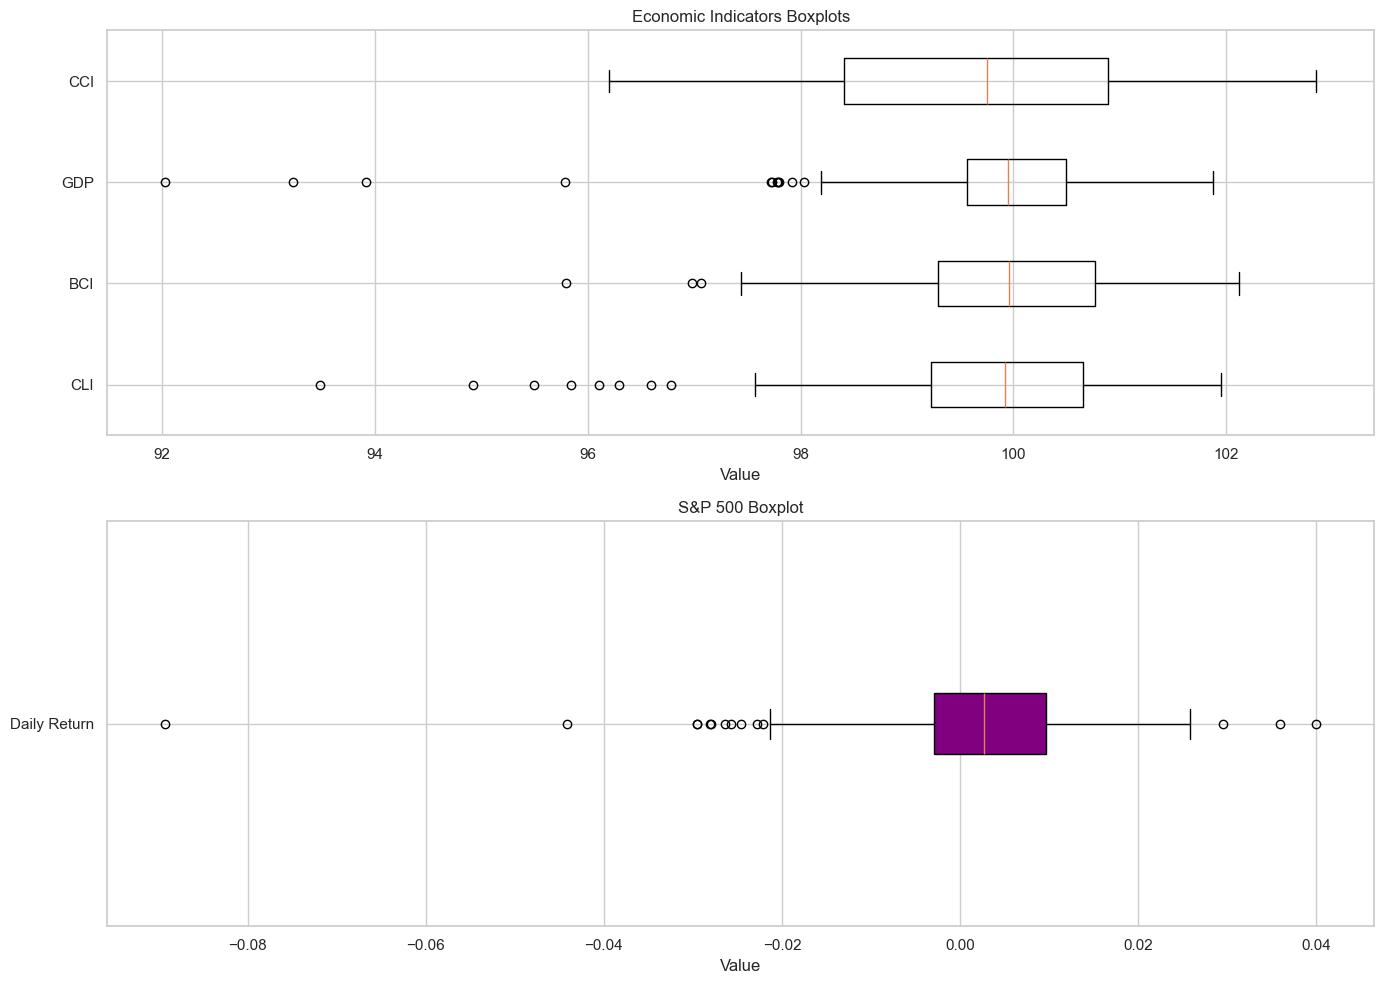

In [11]:
a.plot_boxplots()

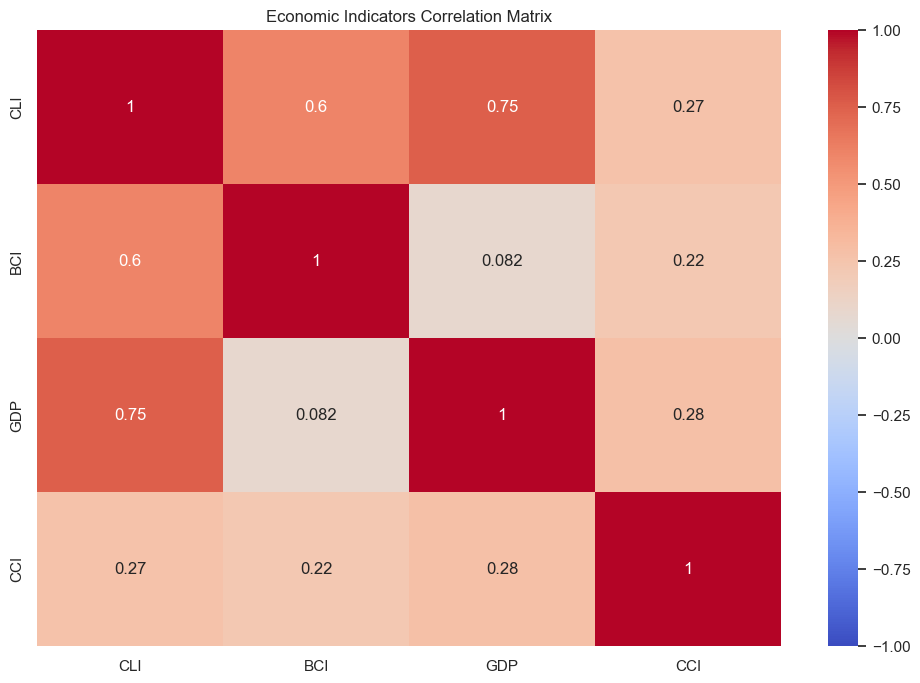

In [12]:
a.plot_correlation_matrix()

First few rows of the data:
            ^GSPC CLOSE  Daily Return       CLI        BCI       GDP       CCI
Date                                                                          
2000-02-01  1409.280029      0.010628  101.1658  100.61020  101.5818  102.8489
2000-03-01  1379.189941      0.009346  101.0802  100.41700  101.6581  102.7685
2000-05-01  1468.250000      0.010892  100.8442   99.99604  101.7747  102.7249
2000-06-01  1448.810059      0.019858  100.6970   99.77863  101.7674  102.6267
2000-08-01  1438.099976      0.005081  100.3411   99.41608  101.6210  102.5589

Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2000-02-01 to 2024-01-05
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ^GSPC CLOSE   190 non-null    float64
 1   Daily Return  190 non-null    float64
 2   CLI           190 non-null    float64
 3   BCI           190 non-null    float64
 4   GDP           190 n

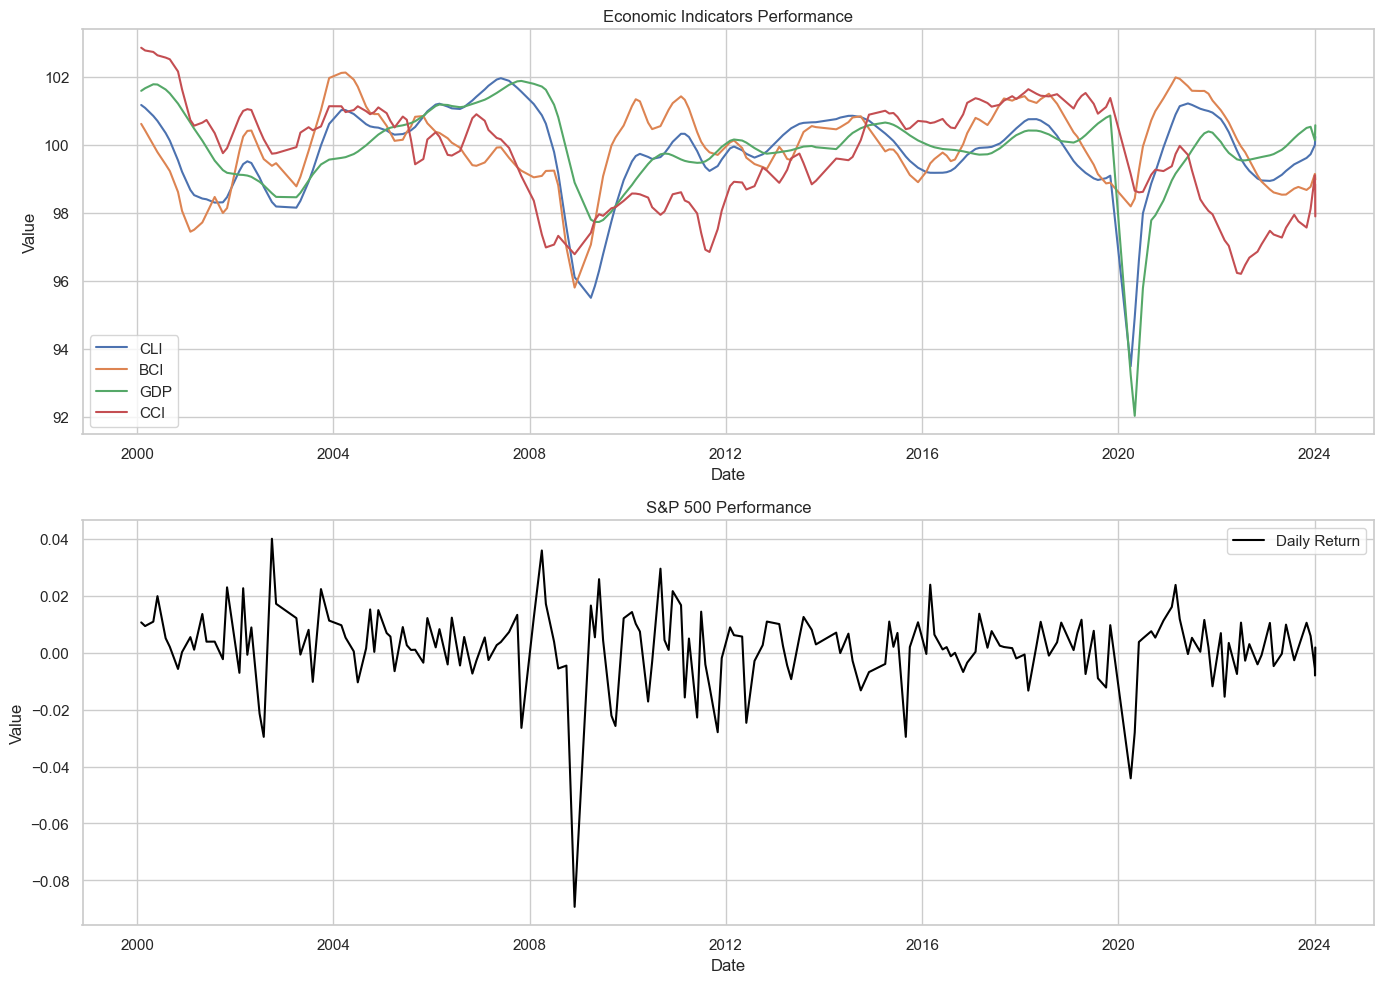

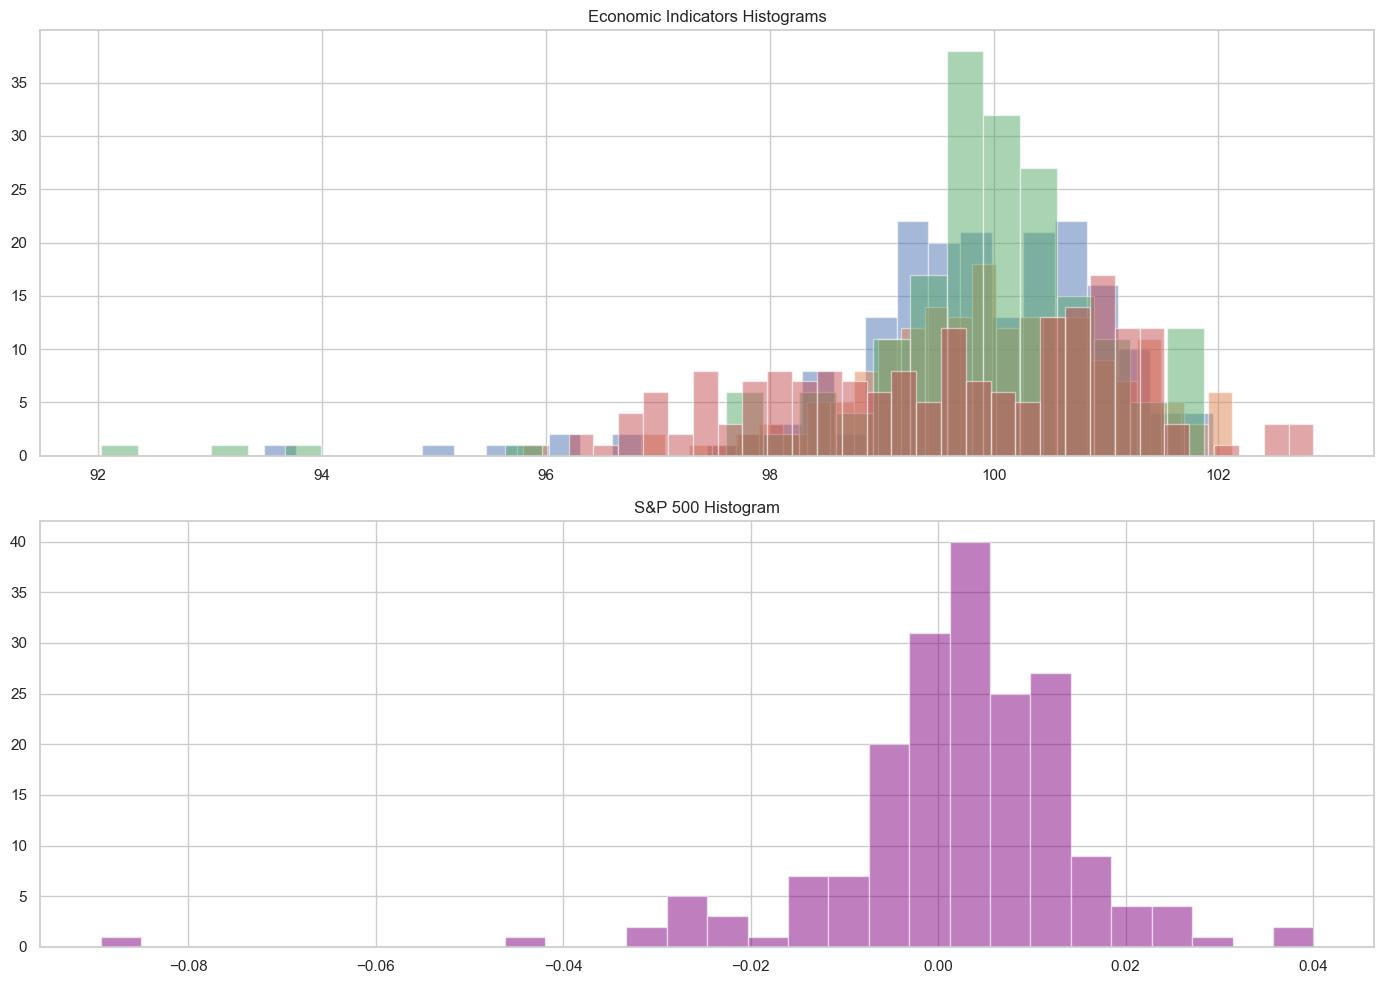

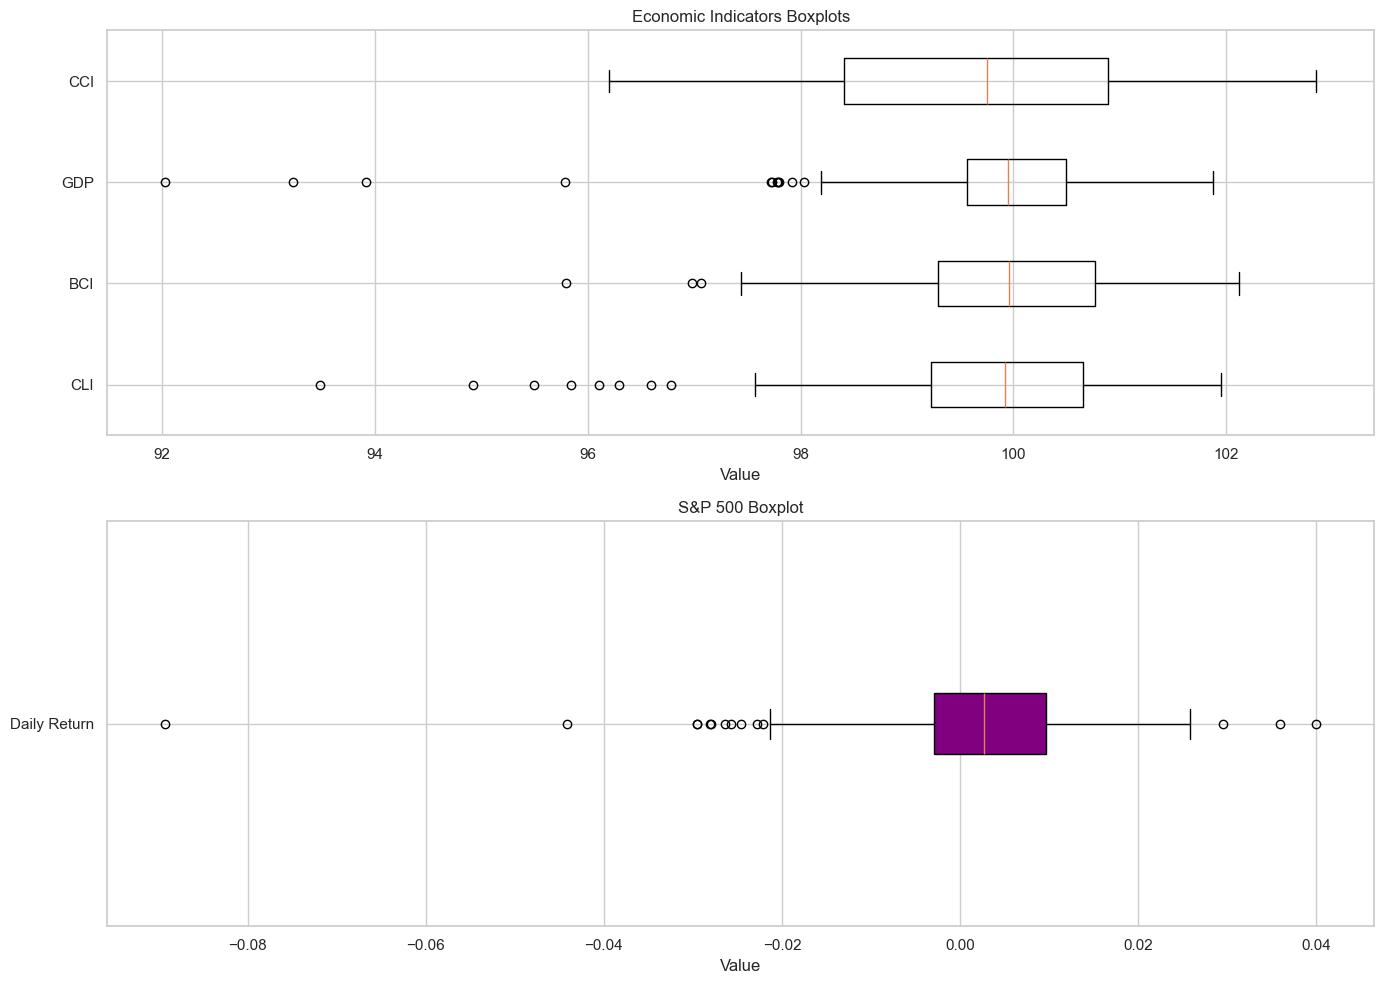

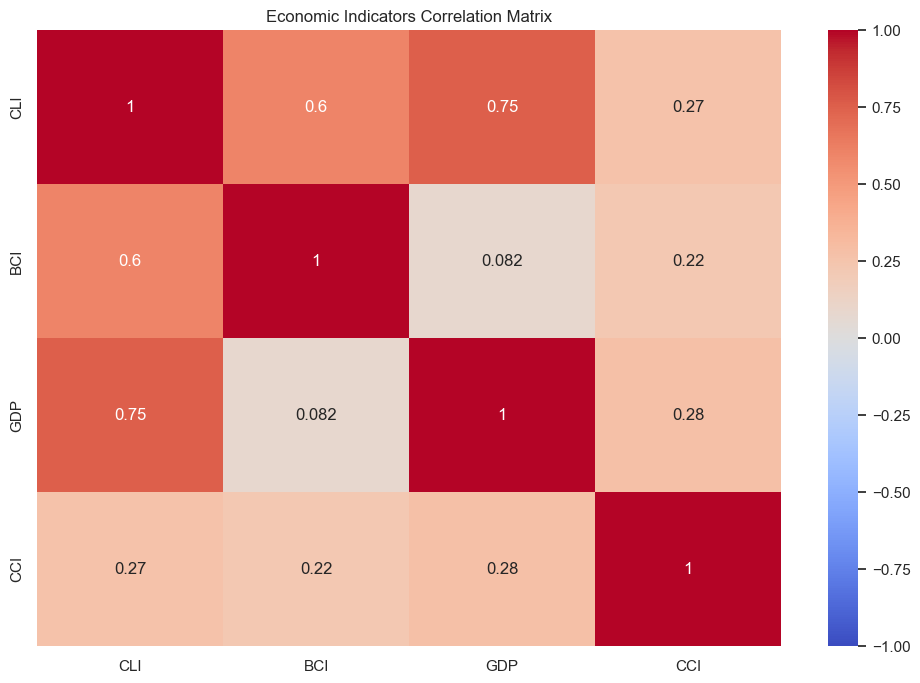

In [13]:
a.perform_EDA_comparison()